In [3]:
import os
import xml.etree.ElementTree as et
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Construction 1
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)
# paths to the xml formatted datasets
path = 'data/training'

In [8]:
data = []
for files in os.listdir(path):
        if files.endswith('.xml'):
            root = et.parse(path + '/' + files).getroot()
            question = root.find('questionText').text.replace("\n", " ")
            # get reference and student answers from the files
            ref_answers = [x for x in root.find('referenceAnswers')]
            stud_answers = [x for x in root.find('studentAnswers')]

            if len(ref_answers) == 1:
                ref = ref_answers[0].text.strip()
                for x in stud_answers:
                    # arrange the text sequences according to the set parameters
                    response = x.find('response').text.strip()
                    feedback = x.find('response_feedback').text.strip()
                    score = x.find('score').text.strip()
                    label = x.find('verification_feedback').text
                    if label == "Correct":
                        label = 0
                    elif label == "Partially correct":
                        label = 1
                    elif label == "Incorrect":
                        label = 2

                    # lowercase data
                    data.append({
                        'student_answer':tokenizer(response.lower()),
                        'reference_answer': tokenizer(ref.lower()),
                        'question': tokenizer(question.lower()),
                        'label': label,
                        'score': score
                    })

In [18]:
print(data[0]['student_answer'])

purpose: duplicate avoidance and find the “best” route / shortest path with spanning trees, easy to implement reverse path forwarding (rpf): each sender knows the network as spanning tree for itself. intermediate systems (is) must not know the spanning trees. once a packet arrived at a is there are two possible ways to forward: (assuming shortest path transmission/”best route”) * once a packet arrived from node a on the same link as node b expect packets by its routing table, then this packet will be forwarded to all other links except the incoming link. * once a packet arrived from node a on another link as node b expect packets from a, then this packet will be discarded. reverse path broadcast (rpb): works like rpf but chooses specific links for the outgoing traffic. by forwarding unicast packets an is e.g. m learns whether it is located on the shortest path between two other nodes (e.g. node s and d). if this is not the case and s is sending a broadcasting packet, m would not forwar

In [21]:
print(data['label'])

TypeError: list indices must be integers or slices, not str

In [48]:
def print_distribution(data_list, print_values=False):
    unique, counts = np.unique(data_list, return_counts=True)
    if print_values:
        print(unique, counts)
    plt.bar(unique, counts, 1)
    plt.title('Class Frequency')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

In [46]:
def print_min_max(data_list):
    print('min:', np.min(data_list))
    print('max:', np.max(data_list))

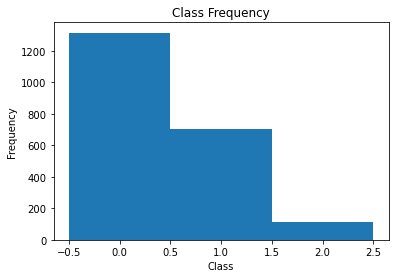

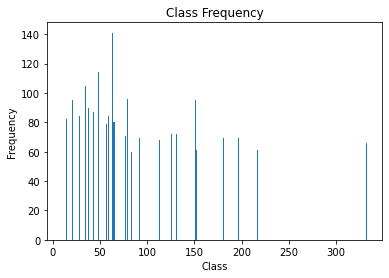

min: 11
max: 332


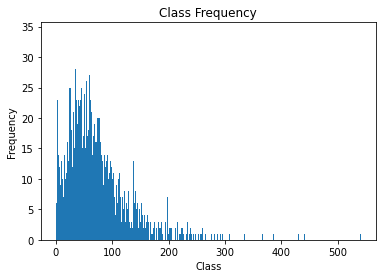

min: 1
max: 540


In [49]:
print_distribution([d['label'] for d in data])
print_distribution([len(d['reference_answer']) for d in data])
print_min_max([len(d['reference_answer']) for d in data])
print_distribution([len(d['student_answer']) for d in data])
print_min_max([len(d['student_answer']) for d in data])

1744
383
min: 0.0
max: 1.0
min: 1.25
max: 3.5
[0.    0.1   0.125 0.2   0.25  0.3   0.375 0.38  0.4   0.5   0.6   0.625
 0.63  0.68  0.7   0.75  0.8   0.875 0.88  0.9   1.   ] [110   2   1   2  69   1   3   2   4 310   9  15   5   2   2 244  15  20
  30   4 894]


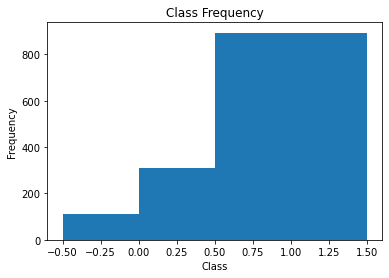

In [50]:
scores_bigger1 = []
score_list = []
for d in data:
    score = float(d['score'])
    if score > 1:
        scores_bigger1.append(score)
    else:
        score_list.append(score)

print(len(score_list))
print(len(scores_bigger1))
print_min_max(score_list)
print_min_max(scores_bigger1)
#score_list_norm = [(d-np.min(score_list))/(np.max(score_list)-np.min(score_list)) for d in score_list]
print_distribution(score_list)